This project is used to culculate the estimate alpha and beta in capm formala.

In [1]:
import pandas as pd
import file_operations
import os
import statsmodels.api as sm
from numpy import nan as nan
from datetime import datetime
import csv

### Get current date as a tag for later use.

In [2]:
Current_Date_TAG_1 = datetime.now().strftime("%Y-%m-%d")

# Getting the E(R_i) and E(R_m) data.

## Getting current working directory and data directory.

In [3]:
# Get current working directory
current_dir = os.getcwd()
print("Current working directory:", current_dir)
data_dir = os.path.join(current_dir, 'Data')
os.makedirs(data_dir, exist_ok=True)

default_chosen_security_file_path = os.path.join(data_dir, 'K线导出_600873_日线数据.xlsx')
default_index_file_path = os.path.join(data_dir, 'K线导出_000001_日线数据.xlsx')
default_R_f_file_path = os.path.join(data_dir, 'R_f.xlsx')

Current working directory: d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1


## Ask the user if want to change to another file directory

In [4]:
change_security_io = input("Do you want to change the chosen security's data file path? (yes or no/y or n): ")
if change_security_io.lower() in ['yes', 'y']:
    security_file_path = input("Enter new file path for the chosen security's data: ")
else:
    security_file_path = default_chosen_security_file_path
print(f"Chossing security file path: {security_file_path}")

change_index_io = input("Do you want to change the index's data file path? (yes or no/y or n): ")
if change_index_io.lower() in ['yes', 'y']:
    index_file_path = input("Enter new file path for the index's data: ")
else:
    index_file_path = default_index_file_path
print(f"Chossing market portfolio file path: {index_file_path}")
    
change_R_f_io = input("Do you want to change the R_f's data file path? (yes or no/y or n): ")
if change_index_io.lower() in ['yes', 'y']:
    R_f_file_path = input("Enter new file path for the index's data: ")
else:
    R_f_file_path = default_R_f_file_path
print(f"Chossing risk free rate file path: {R_f_file_path}")

Chossing security file path: d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1\Data\K线导出_600873_日线数据.xlsx
Chossing market portfolio file path: d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1\Data\K线导出_000001_日线数据.xlsx
Chossing risk free rate file path: d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1\Data\R_f.xlsx


## Create the i_df and m_df pandas dataframe for chosen security and index 

In [5]:
i_df = file_operations.read_and_return_pd_df(security_file_path)
m_df = file_operations.read_and_return_pd_df(index_file_path)
R_f_df = file_operations.read_and_return_pd_df(R_f_file_path)

The input file path is: 
d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1\Data\K线导出_600873_日线数据.xlsx
Reading the input file...
The input file path is: 
d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1\Data\K线导出_000001_日线数据.xlsx
Reading the input file...
The input file path is: 
d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1\Data\R_f.xlsx
Reading the input file...


## Change all the data into nice types, e.g securiry code was changed into U6 meaning this is a string that holds up to 6 numbers or characters, head was changed to english, date to datetime datatype, numerical data to float 64

In [6]:
for df in [i_df, m_df]:
    df.dropna(inplace = True)
    file_operations.change_head_to_ENG(df)
    file_operations.change_date_to_datetime(df)
    file_operations.change_numerical_data_to_float64(df)
    file_operations.change_secu_code_to_str(df)
    display(df.info())
    display(df.head())
    display(df.tail())


<class 'pandas.core.frame.DataFrame'>
Index: 6903 entries, 0 to 6902
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SECU_CODE   6903 non-null   object        
 1   SECU_NAME   6903 non-null   object        
 2   DATE        6903 non-null   datetime64[ns]
 3   OPENING     6903 non-null   float64       
 4   HIGHEST     6903 non-null   float64       
 5   LOWEST      6903 non-null   float64       
 6   CLOSING     6903 non-null   float64       
 7   CHANGE      6902 non-null   float64       
 8   PCT_CHANGE  6902 non-null   float64       
 9   VOLUME      6903 non-null   float64       
 10  AMOUNT      6903 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 647.2+ KB


None

,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
0,600873,梅花生物,1995-02-17,0.83,0.95,0.83,0.90,NaN,NaN,11954900.0,69198000.0
1,600873,梅花生物,1995-02-20,0.88,0.90,0.86,0.87,-0.0287,-3.1825,3859200.0,22417000.0
2,600873,梅花生物,1995-02-21,0.87,0.89,0.85,0.89,0.0180,2.0616,2091500.0,12031000.0
3,600873,梅花生物,1995-02-22,0.89,1.32,0.88,1.26,0.3698,41.4993,16299000.0,118230000.0
4,600873,梅花生物,1995-02-23,1.21,1.51,1.18,1.51,0.2531,20.0730,18309200.0,158378000.0


,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
6898,600873,梅花生物,2025-02-24,9.27,9.35,9.19,9.22,-0.06,-0.6466,25047614.0,231623416.0
6899,600873,梅花生物,2025-02-25,9.21,9.25,9.14,9.16,-0.06,-0.6508,18224499.0,167416994.0
6900,600873,梅花生物,2025-02-26,9.18,9.31,9.16,9.20,0.04,0.4367,20431326.0,188213678.0
6901,600873,梅花生物,2025-02-27,9.21,9.31,9.18,9.31,0.11,1.1957,24501664.0,226866947.0
6902,600873,梅花生物,2025-02-28,9.30,9.40,9.23,9.26,-0.05,-0.5371,21684154.0,201727094.0


<class 'pandas.core.frame.DataFrame'>
Index: 8348 entries, 0 to 8347
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SECU_CODE   8348 non-null   object        
 1   SECU_NAME   8348 non-null   object        
 2   DATE        8348 non-null   datetime64[ns]
 3   OPENING     8348 non-null   float64       
 4   HIGHEST     8348 non-null   float64       
 5   LOWEST      8348 non-null   float64       
 6   CLOSING     8348 non-null   float64       
 7   CHANGE      8347 non-null   float64       
 8   PCT_CHANGE  8347 non-null   float64       
 9   VOLUME      8348 non-null   float64       
 10  AMOUNT      8348 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 782.6+ KB


None

,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
0,000001,上证指数,1990-12-19,96.05,99.98,95.79,99.98,NaN,NaN,126000.0,494000.0
1,000001,上证指数,1990-12-20,104.30,104.39,99.98,104.39,4.41,4.4109,19700.0,84000.0
2,000001,上证指数,1990-12-21,109.07,109.13,103.73,109.13,4.74,4.5407,2800.0,16000.0
3,000001,上证指数,1990-12-24,113.57,114.55,109.13,114.55,5.42,4.9666,3200.0,31000.0
4,000001,上证指数,1990-12-25,120.09,120.25,114.55,120.25,5.70,4.9760,1500.0,6000.0


,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
8343,000001,上证指数,2025-02-24,3374.08,3384.81,3355.87,3373.03,-6.085,-0.1801,5.981882e+10,8.028471e+11
8344,000001,上证指数,2025-02-25,3345.65,3369.56,3337.84,3346.04,-26.988,-0.8001,5.275786e+10,7.275098e+11
8345,000001,上证指数,2025-02-26,3351.21,3380.21,3351.21,3380.21,34.175,1.0214,5.539920e+10,7.478874e+11
8346,000001,上证指数,2025-02-27,3378.45,3388.78,3353.57,3388.06,7.848,0.2322,5.758150e+10,7.740600e+11
8347,000001,上证指数,2025-02-28,3374.66,3383.19,3318.72,3320.90,-67.162,-1.9823,5.683195e+10,7.580549e+11


In [7]:
display(R_f_df.info())
display(R_f_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    7 non-null      datetime64[ns]
 1   R_f     7 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 244.0 bytes


None

,DATE,R_f
0,2022-01-01,0.0380
1,2022-01-20,0.0370
2,2022-08-22,0.0365
3,2023-06-20,0.0355
4,2023-08-21,0.0345
5,2024-07-22,0.0335
6,2024-10-20,0.0310


## Stores the stock ID as a variable for later use.

In [8]:
Stock_ID_TAG_2 = i_df.iat[0, 0]
print(Stock_ID_TAG_2)
Stock_Name_TAG_3 = i_df.iat[0, 1]
print(Stock_Name_TAG_3)

600873
梅花生物


## Drop useless columns & Convert string to float for closing price.

In [9]:
i_df, m_df = [df[['DATE', 'CLOSING']] for df in [i_df, m_df]]
display(i_df.head())
display(m_df.head())

,DATE,CLOSING
0,1995-02-17,0.90
1,1995-02-20,0.87
2,1995-02-21,0.89
3,1995-02-22,1.26
4,1995-02-23,1.51


,DATE,CLOSING
0,1990-12-19,99.98
1,1990-12-20,104.39
2,1990-12-21,109.13
3,1990-12-24,114.55
4,1990-12-25,120.25


## Change the data into the same shape based on time.

Here `df = pd.merge(i_df, m_df, on='DATE', how='inner')`, `i_df` and `m_df` are the dataframe that I want to merge, and on='DATE meaning that this merge will be based on DATE column, and inner means that this will merge the rows that exist a time on both datafram.

In [10]:
df = pd.merge(i_df, m_df, on='DATE', how='inner')
df = df.rename(columns = {'CLOSING_x': 'Chosen Stock Closing Price', 'CLOSING_y': 'Market Portfolio Closing Price'})
df.dropna(inplace = True)
display(df.head())
display(df.info())
display(df.tail())

,DATE,Chosen Stock Closing Price,Market Portfolio Closing Price
0,1995-02-17,0.90,533.76
1,1995-02-20,0.87,534.96
2,1995-02-21,0.89,541.14
3,1995-02-22,1.26,594.64
4,1995-02-23,1.51,589.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE                            6903 non-null   datetime64[ns]
 1   Chosen Stock Closing Price      6903 non-null   float64       
 2   Market Portfolio Closing Price  6903 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 161.9 KB


None

,DATE,Chosen Stock Closing Price,Market Portfolio Closing Price
6898,2025-02-24,9.22,3373.03
6899,2025-02-25,9.16,3346.04
6900,2025-02-26,9.20,3380.21
6901,2025-02-27,9.31,3388.06
6902,2025-02-28,9.26,3320.90


## Getting the percentage change columns

In [11]:
df['i_pct_change'] = df['Chosen Stock Closing Price'].pct_change()
df['m_pct_change'] = df['Market Portfolio Closing Price'].pct_change()
display(df.head())
display(df.info())

,DATE,Chosen Stock Closing Price,Market Portfolio Closing Price,i_pct_change,m_pct_change
0,1995-02-17,0.90,533.76,NaN,NaN
1,1995-02-20,0.87,534.96,-0.033333,0.002248
2,1995-02-21,0.89,541.14,0.022989,0.011552
3,1995-02-22,1.26,594.64,0.415730,0.098865
4,1995-02-23,1.51,589.12,0.198413,-0.009283


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE                            6903 non-null   datetime64[ns]
 1   Chosen Stock Closing Price      6903 non-null   float64       
 2   Market Portfolio Closing Price  6903 non-null   float64       
 3   i_pct_change                    6902 non-null   float64       
 4   m_pct_change                    6902 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 269.8 KB


None

## Change the time range to 2022-01-01 to 2025-02-28 and Drop the useless column since now we have the percent change column.

Getting the start and the end date.

In [12]:
Start_Date = '2022-01-01'
End_Date = df.iat[-1, 0]
End_Date = End_Date.strftime('%Y-%m-%d')
Sample_Range_TAG_4 = Start_Date + " to " + End_Date

In [13]:
df = df.loc[(df['DATE'] > Start_Date) & (df['DATE'] <= End_Date)]
to_drop = ['Chosen Stock Closing Price', 'Market Portfolio Closing Price']
df.drop(to_drop, axis = 1, inplace = True)
display(df.head())
df = df.reset_index(drop=True)
display(df.head())
display(df.info())

,DATE,i_pct_change,m_pct_change
6141,2022-01-04,0.014903,-0.002047
6142,2022-01-05,-0.046990,-0.010228
6143,2022-01-06,0.009245,-0.002531
6144,2022-01-07,-0.041221,-0.001824
6145,2022-01-10,0.066879,0.003906


,DATE,i_pct_change,m_pct_change
0,2022-01-04,0.014903,-0.002047
1,2022-01-05,-0.046990,-0.010228
2,2022-01-06,0.009245,-0.002531
3,2022-01-07,-0.041221,-0.001824
4,2022-01-10,0.066879,0.003906


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          762 non-null    datetime64[ns]
 1   i_pct_change  762 non-null    float64       
 2   m_pct_change  762 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 18.0 KB


None

In [14]:
print(Start_Date)
print(End_Date)
print(Stock_ID_TAG_2)
print(Stock_Name_TAG_3)
print(Sample_Range_TAG_4)

2022-01-01
2025-02-28
600873
梅花生物
2022-01-01 to 2025-02-28


## Add a new column of R_f

### Define a function that calculate the R_f for daily changes from yearly.

In [15]:
def yearly_to_daily(R_f_y):
    return ((R_f_y + 1) ** (1 / 365)) - 1
R_f_df = R_f_df.sort_values(by='DATE')
display(R_f_df)
R_f_df['R_f'] = yearly_to_daily(R_f_df['R_f'])
display(R_f_df)

,DATE,R_f
0,2022-01-01,0.0380
1,2022-01-20,0.0370
2,2022-08-22,0.0365
3,2023-06-20,0.0355
4,2023-08-21,0.0345
5,2024-07-22,0.0335
6,2024-10-20,0.0310


,DATE,R_f
0,2022-01-01,0.000102
1,2022-01-20,0.000100
2,2022-08-22,0.000098
3,2023-06-20,0.000096
4,2023-08-21,0.000093
5,2024-07-22,0.000090
6,2024-10-20,0.000084


In [16]:
df = pd.merge_asof(df, R_f_df, on='DATE', direction='backward')

In [17]:
display(df.info())
display(df['R_f'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          762 non-null    datetime64[ns]
 1   i_pct_change  762 non-null    float64       
 2   m_pct_change  762 non-null    float64       
 3   R_f           762 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 23.9 KB


None

array([1.02185453e-04, 9.95444864e-05, 9.82230507e-05, 9.55782710e-05,
       9.29309430e-05, 9.02810618e-05, 8.36451557e-05])

## Getting R_i and R_m for each consecutive day. 

In [18]:
E_R_i = df['i_pct_change'].mean()
E_R_m = df['m_pct_change'].mean()
display(df)
print(f"E(R_i): ", E_R_i)
print(f"E(R_m): ", E_R_m)

,DATE,i_pct_change,m_pct_change,R_f
0,2022-01-04,0.014903,-0.002047,0.000102
1,2022-01-05,-0.046990,-0.010228,0.000102
2,2022-01-06,0.009245,-0.002531,0.000102
3,2022-01-07,-0.041221,-0.001824,0.000102
4,2022-01-10,0.066879,0.003906,0.000102
...,...,...,...,...
757,2025-02-24,-0.006466,-0.001799,0.000084
758,2025-02-25,-0.006508,-0.008002,0.000084
759,2025-02-26,0.004367,0.010212,0.000084
760,2025-02-27,0.011957,0.002322,0.000084


E(R_i):  0.0005991181424896417
E(R_m):  -6.443108356686847e-05


In [19]:
df.dropna(inplace = True)
display(df.head())
display(df.info())

,DATE,i_pct_change,m_pct_change,R_f
0,2022-01-04,0.014903,-0.002047,0.000102
1,2022-01-05,-0.046990,-0.010228,0.000102
2,2022-01-06,0.009245,-0.002531,0.000102
3,2022-01-07,-0.041221,-0.001824,0.000102
4,2022-01-10,0.066879,0.003906,0.000102


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          762 non-null    datetime64[ns]
 1   i_pct_change  762 non-null    float64       
 2   m_pct_change  762 non-null    float64       
 3   R_f           762 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 23.9 KB


None

## Get excess_return_i and excess_return_m

In [20]:
df['excess_return_i'] = df['i_pct_change'] - df['R_f']
df['excess_return_m'] = df['m_pct_change'] - df['R_f']
display(df.head())

,DATE,i_pct_change,m_pct_change,R_f,excess_return_i,excess_return_m
0,2022-01-04,0.014903,-0.002047,0.000102,0.014801,-0.002149
1,2022-01-05,-0.046990,-0.010228,0.000102,-0.047092,-0.010330
2,2022-01-06,0.009245,-0.002531,0.000102,0.009143,-0.002633
3,2022-01-07,-0.041221,-0.001824,0.000102,-0.041324,-0.001926
4,2022-01-10,0.066879,0.003906,0.000102,0.066777,0.003803


# Fitting the CAPM model

In [21]:
X = sm.add_constant(df['excess_return_m'])
capm_model = sm.OLS(df['excess_return_i'], X).fit()

In [22]:
alpha = capm_model.params['const']
beta = capm_model.params['excess_return_m']
Alpha_TAG_5 = alpha
Beta_TAG_6 = beta
print("Alpha:", alpha)
print("Beta:", beta)

Alpha: 0.0006445155073344414
Beta: 0.880285341280072


# Checking the model and the regression line.

Deleted existing file: d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1\Output\Output Figure\600873.png.
Recreated a new image at: d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1\Output\Output Figure\600873.png.


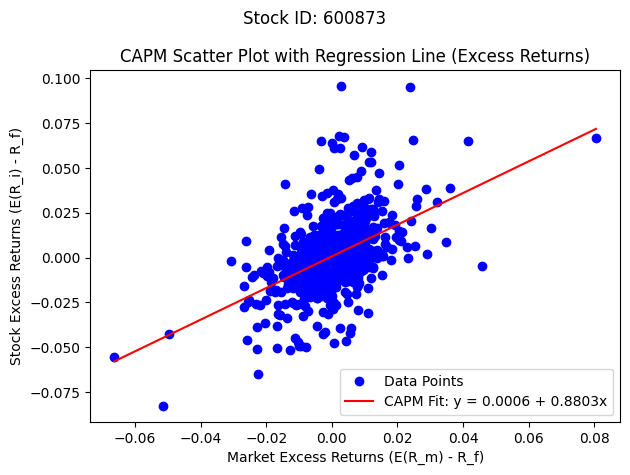

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Extract x (market returns) and y (stock returns)
x = df['excess_return_m']
y = df['excess_return_i']

# Plot scatter points
plt.scatter(x, y, color='blue', label='Data Points')
# plt.rcParams['font.family'] = 'Arial Unicode MS'

# Create a line for the CAPM regression
x_line = np.linspace(x.min(), x.max(), 100)
y_line = alpha + beta * x_line

# Plot the CAPM regression line
plt.plot(x_line, y_line, color='red', label=f'CAPM Fit: y = {alpha:.4f} + {beta:.4f}x')

# Labeling the plot
plt.xlabel('Market Excess Returns (E(R_m) - R_f)')
plt.ylabel('Stock Excess Returns (E(R_i) - R_f)')
plt.title('CAPM Scatter Plot with Regression Line (Excess Returns)')
plt.suptitle(f"Stock ID: {Stock_ID_TAG_2}")
plt.legend()
plt.tight_layout()

output_directory = os.path.join(current_dir, 'Output')
output_img_directory = os.path.join(output_directory, 'Output Figure')
os.makedirs(output_img_directory, exist_ok=True)
output_img = os.path.join(output_img_directory, Stock_ID_TAG_2 + ".png")
if os.path.exists(output_img):
    os.remove(output_img)
    print(f"Deleted existing file: {output_img}.")
    plt.savefig(output_img)
    print(f"Recreated a new image at: {output_img}.")
else:
    plt.savefig(output_img)
    print(f"Figure Saved to :{output_img}. ")

plt.show()

# Storing all of the data into a output file.

In [24]:
output_csv_directory = os.path.join(output_directory, 'Output CSV')
print(output_csv_directory)
os.makedirs(output_csv_directory, exist_ok=True)

d:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Dissertation Project 1\Output\Output CSV


In [25]:
csv_path = os.path.join(output_csv_directory, 'output_history.csv')
header = ['Run Date', 'Stock ID', 'Stock Name', 'Sample Range', 'Alpha', 'Beta']

In [26]:
csv_file_exists = os.path.isfile(csv_path)
with open(csv_path, 'a', newline = '', encoding = 'utf-8') as f:
    writer = csv.DictWriter(f, fieldnames = header)
    if not csv_file_exists:
        writer.writeheader()  # Write header if file is new
    # Append the new data as a row
    writer.writerow({
        'Run Date': Current_Date_TAG_1,
        'Stock ID': Stock_ID_TAG_2,
        'Stock Name': Stock_Name_TAG_3,
        'Sample Range': Sample_Range_TAG_4,
        'Alpha': Alpha_TAG_5,
        'Beta': Beta_TAG_6
    })
print("Data appended successfully!")

Data appended successfully!


## Getting all the columns

In [27]:
print(f"Column 1: {Current_Date_TAG_1}")
print(f"Column 2: {Stock_ID_TAG_2}")
print(f"Column 3: {Stock_Name_TAG_3}")
print(f"Column 4: {Sample_Range_TAG_4}")
print(f"Column 5: {Alpha_TAG_5}")
print(f"Column 6: {Beta_TAG_6}")

Column 1: 2025-03-02
Column 2: 600873
Column 3: 梅花生物
Column 4: 2022-01-01 to 2025-02-28
Column 5: 0.0006445155073344414
Column 6: 0.880285341280072
